In [1]:
import pandas as pd

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df'
df

,Player,YEAR,RUNS
0,Virat Kohli,2008,165
1,Virat Kohli,2009,246
2,Virat Kohli,2010,307
3,Virat Kohli,2011,557
4,Virat Kohli,2012,364
...,...,...,...
152,Dinesh Karthik,2019,253
153,Dinesh Karthik,2020,169
154,Dinesh Karthik,2021,223
155,Dinesh Karthik,2022,330


In [2]:
!pip install pandas matplotlib


In [3]:
!pip install plotly seaborn

In [4]:
import pandas as pd
import plotly.express as px

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Add a "Type" column with the value "RUNS"
df = df.assign(Type='RUNS')

# Convert "Runs" column to numeric
df['RUNS'] = pd.to_numeric(df['RUNS'], errors='coerce')

# Create an animated bar chart using plotly
fig = px.bar(df, x='Player', y='RUNS', color='Player', animation_frame='YEAR',
             labels={'Runs': 'Runs'},
             title='IPL Runs Over the Years',
             template='plotly_dark')

# Set y-axis range for better visualization
fig.update_layout(yaxis=dict(range=[0, max(df['RUNS'].dropna()) + 50]))

# Adjust the animation speed (duration in milliseconds)
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                            method='animate', args=[None, dict(frame=dict(duration=1500, redraw=True), fromcurrent=True)]),
                                dict(label='Pause',
                                            method='animate', args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate', transition=dict(duration=0))])])])

# Show the animated chart
fig.show()

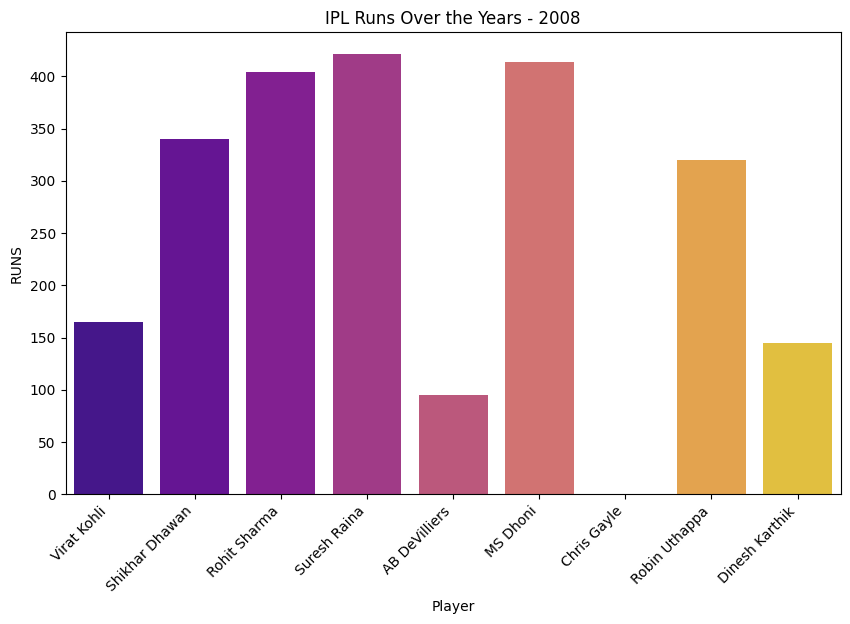

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Add a "Type" column with the value "RUNS"
df = df.assign(Type='RUNS')

# Create an animated bar chart using seaborn
fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    ax.clear()
    current_year_data = df[df['YEAR'] == frame]
    sns.barplot(data=current_year_data, x='Player', y='RUNS', ax=ax, palette='plasma')
    ax.set_title(f'IPL Runs Over the Years - {frame}')
    ax.set_ylabel('RUNS')
    ax.set_xlabel('Player')
    plt.xticks(rotation=45, ha='right')

# Animate the bar chart over the years
years = df['YEAR'].unique()
animation = FuncAnimation(fig, update, frames=years, repeat=False)

# Save the animation to a file (optional)
animation.save('animated_chart.gif', writer='pillow', fps=2)  # Change the file name and adjust fps as needed

#Objective - Analyse Different players perfromance across different seasons.
Analysis -
Dominant Run-Scorers:
1. Virat Kohli: Consistently reigns supreme as the overall highest run-scorer with over 7263 runs across all seasons. His leadership and batting prowess for Royal Challengers Bangalore have cemented his place as an IPL legend.
2. Shikhar Dhawan: Hot on Kohli's heels, Dhawan stands strong in second place with over 6617 runs. His consistently impressive performances for Delhi Capitals and other teams solidify his status as a top-tier batsman.
3. David Warner: Another formidable force, Warner occupies the third spot with over 6397 runs. His explosive batting for Delhi Capitals and Sunrisers Hyderabad has earned him a legion of fans.

Overall Increase in Runs Scored: The data reveals a clear upward trend in run-scoring. Batsmen in later seasons seem to be racking up higher numbers compared to earlier years. This could be attributed to factors like improved training, advancements in equipment, and changes in playing rules favoring batters.

Emergence of New Contenders: Beyond the established top scorers, the graphs hint at promising performances by other batsmen. Players like Rohit Sharma, Suresh Raina, AB de Villiers, Chris Gayle, MS Dhoni, and Robin Uthappa all showcase impressive run-scoring records, suggesting a dynamic and competitive landscape for future seasons.

**(Kindly view the .gif file, it will be downloaded once the code is run.)**

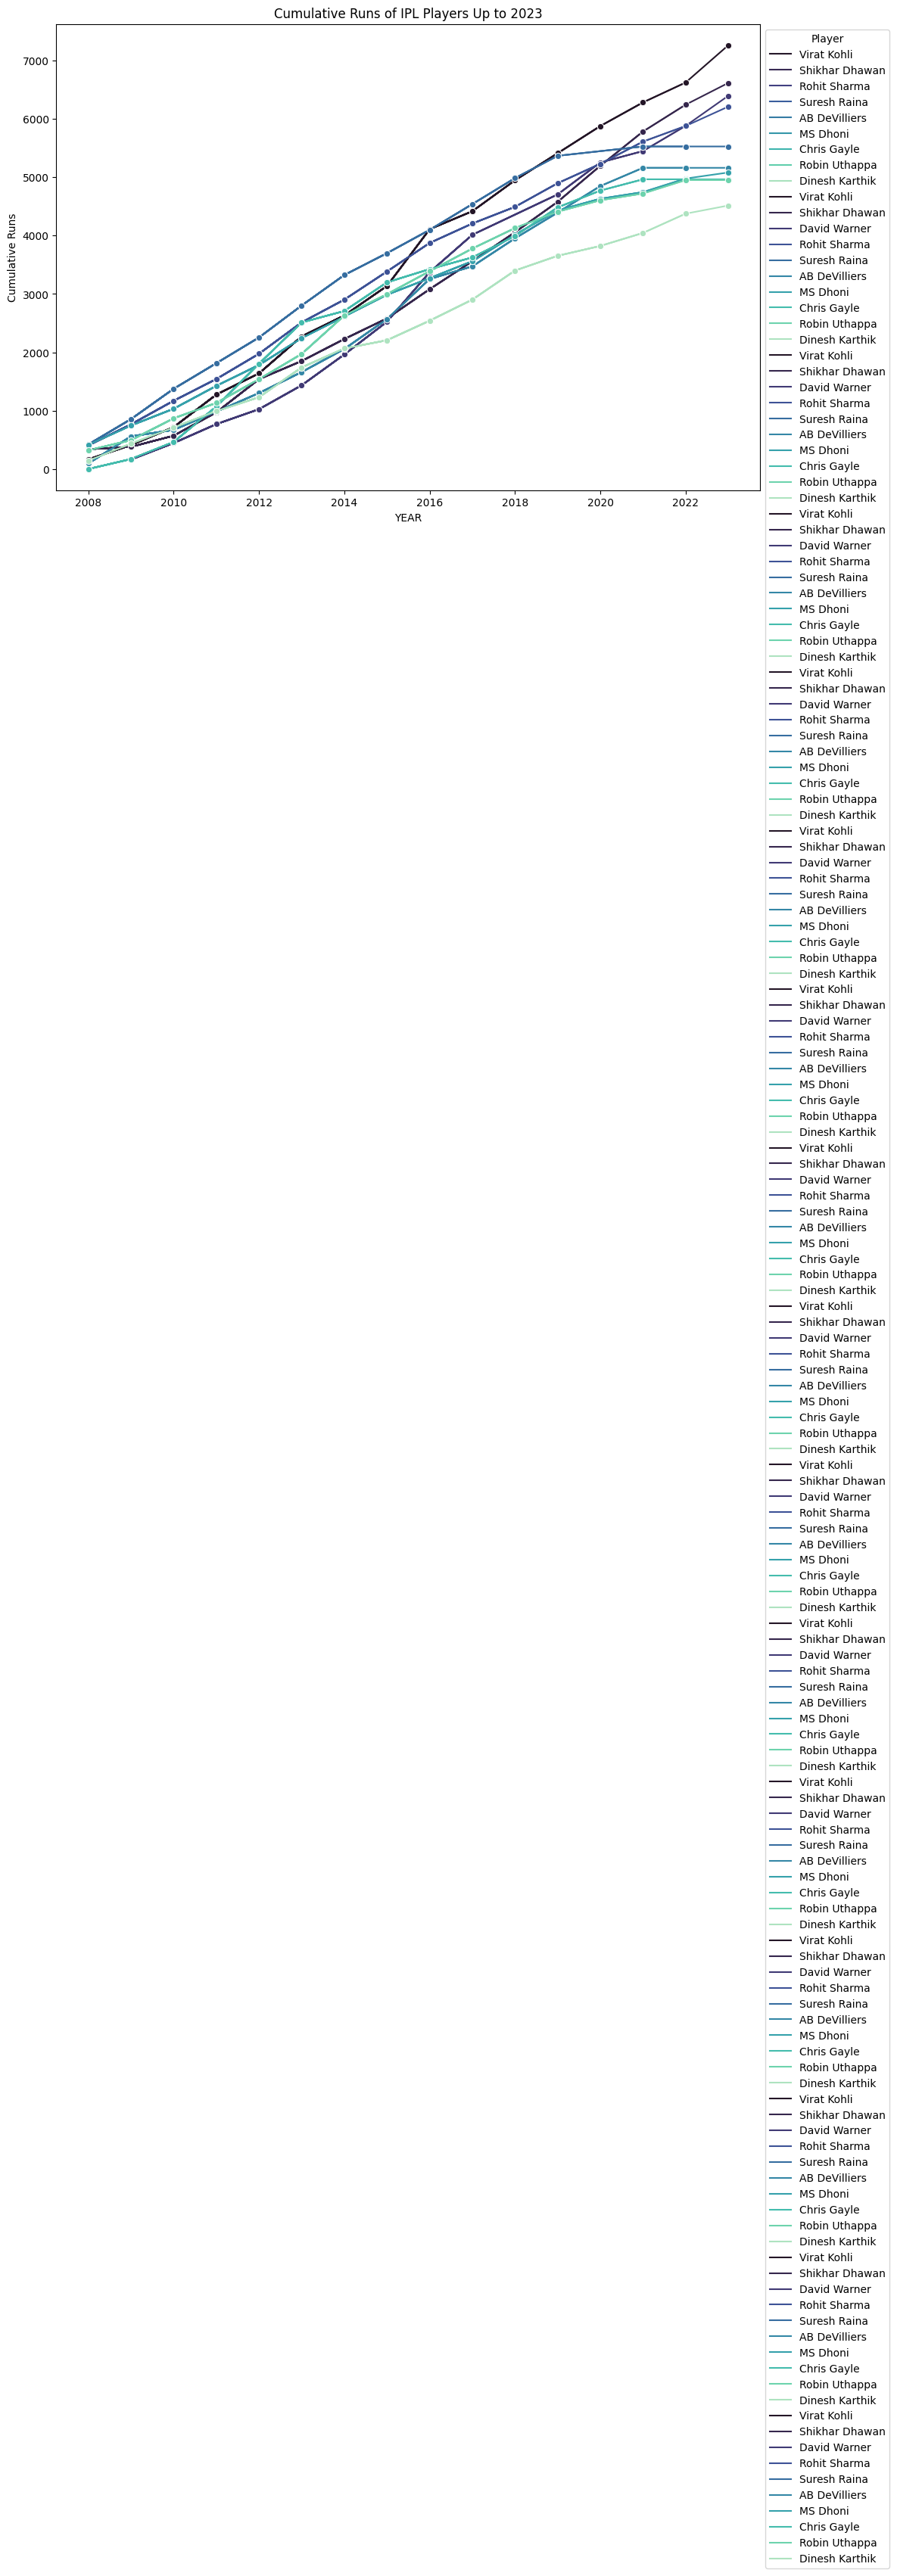

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Add a "Type" column with the value "RUNS"
df = df.assign(Type='RUNS')

# Convert "Runs" column to numeric
df['RUNS'] = pd.to_numeric(df['RUNS'], errors='coerce')

# Calculate cumulative runs for each player over the years
df['Cumulative Runs'] = df.groupby('Player')['RUNS'].cumsum()

# Create a line plot for each player's cumulative runs over the years using seaborn
plt.figure(figsize=(12, 8))

# Plot cumulative runs for each player
for year in df['YEAR'].unique():
    current_data = df[df['YEAR'] <= year]
    sns.lineplot(data=current_data, x='YEAR', y='Cumulative Runs', hue='Player', marker='o', palette='mako')
    plt.title(f'Cumulative Runs of IPL Players Up to {year}')
    plt.xlabel('YEAR')
    plt.ylabel('Cumulative Runs')
    plt.legend(title='Player', loc='upper left', bbox_to_anchor=(1, 1))
    display(plt.gcf())
    time.sleep(0.5)  # Pause for 0.5 seconds between frames
    clear_output(wait=True)

plt.show()

# Objective
Analysing the trend of cumulative runs of each batsman.
# Analysis
Here are some of the key observations from the graph:
Virat Kohli is the leading run-scorer with the steepest line on the graph, indicating he has consistently accumulated the most runs throughout the years. As of 2023, he has scored over 7263 runs.
Shikhar Dhawan is in second place with a consistently increasing line, close behind Kohli with over 6617 runs.
David Warner is in third place with a line that starts lower than Dhawan's but increases rapidly in recent years, reaching over 6397 runs by 2023.
Rohit Sharma is in fourth place with a steadily increasing line, accumulating over 6211 runs.
Suresh Raina and AB de Villiers are likely in fifth and sixth positions, respectively, although their exact placements are unclear due to the overlapping lines in the middle of the graph. Both have surpassed 5000 runs.
The graph also shows that:

The number of runs scored by the top 10 run-scorers has increased significantly over the years. In 2008, the top 10 run-scorers all scored fewer than 500 runs. In 2023, all of them have scored over 4000 runs.
The lines for some players, like Chris Gayle and MS Dhoni show fluctuations, indicating variations in their performance across different seasons.

Individual Performance:
Chris Gayle: His line shows a notable dip around 2015-2016, possibly due to age and changes in his batting style. His peak performance seems to be around 2011-2013, where his line has a steeper slope.
MS Dhoni: His line shows fluctuations in recent years, potentially reflecting his transition to a more supportive role within the team. His earlier seasons exhibit a consistently increasing score, indicative of his dominant batting prowess.
AB de Villiers: His line features several peaks and valleys, highlighting his dependence on form and playing conditions. His explosive batting power can lead to rapid run accumulation in certain seasons, while occasional dips might be attributed to injuries or strategic variations.

Team Affiliation:
Rohit Sharma: His line shows a steady and consistent increase throughout, reflecting his long-term association with Mumbai Indians and his role as a reliable run-scorer for the team.
Suresh Raina: Similar to Rohit Sharma, his line exhibits a consistent incline, showcasing his loyalty to Chennai Super Kings and his consistent performance as a key batsman.
David Warner: His line initially starts lower compared to others but shows a rapid upsurge in recent years, potentially indicating his adaptation to a new team in Delhi Capitals and his ability to excel even with a change in environment.

Batting Style:
Opening Batsmen: Their lines generally show a steeper slope and faster accumulation of runs, reflecting the advantage of facing the initial overs and setting the tone for the innings.
Middle-Order Batsmen: Their lines typically have a slightly slower initial climb but can exhibit sudden spikes depending on partnerships or specific situations.
Finishers: Their lines often show late surges, emphasizing their ability to accelerate the scoring rate during the closing overs and contribute crucial runs.

In [16]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Add a "Type" column with the value "RUNS"
df = df.assign(Type='RUNS')

# Convert "Runs" column to numeric
df['RUNS'] = pd.to_numeric(df['RUNS'], errors='coerce')

# Create a subplot with pie charts for each year
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Create an initial pie chart
initial_data = df[df['YEAR'] == df['YEAR'].min()]
fig.add_trace(go.Pie(labels=initial_data['Player'], values=initial_data['RUNS'], name=str(initial_data['YEAR'].iloc[0])),
              1, 1)

# Set layout properties
fig.update_layout(title='Distribution of Runs for Each Player Over the Years',
                  template='plotly_dark',
                  updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=2000, redraw=True),
                                                                  fromcurrent=True)])])])

# Define the animation frames with annotations
frames = [go.Frame(data=[
                go.Pie(labels=df[df['YEAR'] == year]['Player'],
                       values=df[df['YEAR'] == year]['RUNS'],
                       name=str(year)),
                go.Scatter(x=[0], y=[0], text=[str(year)], mode='text', showlegend=False)
            ],
            name=str(year))
          for year in df['YEAR'].unique()]

# Update the animation frames
fig.frames = frames

# Make the background of the text annotation lighter
fig.update_layout(annotations=[dict(text='2008-23', x=0.8, y=0.8, xref='paper', yref='paper',
                                    showarrow=False, font=dict(color='white'))])

# Show the chart
fig.show()

# Objective
Yearly Trends of these players from 2008-2023
# Analysis
Overall Trends:

Kohli's Dominance: Virat Kohli emerges as the undisputed run king, consistently contributing significant shares throughout the years. He reaches his peak in 2016 with a whopping 18.9% share, and even in 2023, with a reduced workload, he retains the top spot with 30.4%
Shikhar Dhawan's Steady Rise: Dhawan demonstrates remarkable consistency, gradually increasing his contribution from 6.3% in 2009 to a career-high 21.9% in 2021. He consistently ranks among the top run-getters, forming a formidable partnership with Kohli in many seasons.
David Warner's Fluctuations: Warner showcases explosive potential, scoring heavily in certain years (692 runs in 2019, 548 runs in 2020) but also experiencing periods of absence due to injuries or international commitments.
Rohit Sharma's Consistent Presence: Rohit Sharma remains a reliable contributor throughout, maintaining a steady share around 10-13% in most years. He reaches his peak in 2010 with a 17.5% share and consistently ranks among the top five run-getters.
MS Dhoni's Decline: Dhoni experiences a gradual decline in his run share as he transitions to a finisher role. His highest contribution is in 2008 with 17.9%, but drops significantly in later years.
The Rise and Fall of Suresh Raina: Raina enjoys a successful phase from 2009 to 2015, with his peak in 2013 (18.2%). However, injuries and changes in his batting roles lead to a decline in his contribution in later years.
AB de Villiers' Impactful, Yet Brief Stints: De Villiers' presence is marked by explosive performances (465 runs in 2009, 360 runs in 2013) but limited by shorter playing periods due to international commitments.
Chris Gayle's Boom-or-Bust Style: Gayle exhibits immense power but his contributions are inconsistent, with occasional high scores (733 runs in 2012, 490 runs in 2019) balanced with periods of lower output.
Dinesh Karthik's Unexpected Resurgence: Karthik finds renewed success in recent years, reaching a career-high 12.7% share in 2018 and playing a valuable role as a middle-order batsman.

2009:

Rising Stars: Suresh Raina and Rohit Sharma surge into the top five, demonstrating their potential to become future run-scoring giants.
Fading Giants: MS Dhoni experience slight dips in their shares, hinting at possible shifts in their roles within the team.
2010:

Double Threat: Kohli and Raina solidify their dominance, claiming nearly equal shares and establishing themselves as the leading run-getters.
Rohit's Steady Climb: Rohit Sharma inches closer to the top two, further solidifying his position as a key contributor.
Chris Gayle's Emergence: Gayle debuts with a promising share, hinting at his future potential as a explosive batsman.
2011:

Kohli's Unchallenged Throne: Virat Kohli takes the undisputed crown with a commanding share, showcasing his rise to superstardom.
Declining Giants: AB de Villiers and MS Dhoni continue their downward trend, highlighting the changing dynamics of the top run-scorers.
2012:

Unbreakable Bond: Kohli and Raina strengthen their partnership, both holding onto large shares, ensuring consistent run-scoring dominance.
Rohit's Plateau: Rohit Sharma maintains his share but remains unable to bridge the gap with the top two.
Fading Stars: AB de Villiers and Chris Gayle experience further dips, while MS Dhoni's contribution remains stable.
2013:

Kohli's Unchallenged Throne: Virat Kohli reigns supreme with an unshakable share, reaffirming his status as the undisputed run-scoring king.
Raina's Steadfast Support: Suresh Raina continues to be a reliable partner with a consistent share.
Rohit's Plateau: Rohit Sharma's share stagnates, indicating a need for further improvement to challenge for the top spot.
Beyond 2013:

The trends continue to evolve in the later years, with:

David Warner's explosive bursts and occasional absences.
Shikhar Dhawan's gradual rise to become a consistent top run-getter.
MS Dhoni's transition to a finisher role and reduced run share.
Dinesh Karthik's unexpected resurgence in recent years.
Managerial Takeaways:

These shifts in top contributors provide valuable insights for team management:

Identify and nurture emerging talents: Players like Raina, Sharma, and Warner showcase early potential that can be capitalized on with proper support and training.
Adapt to changing player roles: Recognizing declines in senior players, like Dhoni, and adjusting their roles within the team is crucial for continued success.
Maintain a balanced batting order: Having a diverse mix of consistent high-scorers and explosive batsmen can provide flexibility and resilience against bowling attacks.
Monitor and analyze performance: Tracking individual and team run-scoring trends over time allows for informed decision-making regarding batting order, team composition, and player training.

In [17]:
import pandas as pd

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert "Runs" column to numeric
df['RUNS'] = pd.to_numeric(df['RUNS'], errors='coerce')

# Calculate cumulative runs for each player over the years
df['Cumulative Runs'] = df.groupby(['Player', 'YEAR'])['RUNS'].cumsum()

# Create a new column for growth rate
df['Growth Rate'] = df.groupby('Player')['Cumulative Runs'].pct_change() * 100

# Display the DataFrame with the new column
df

,Player,YEAR,RUNS,Cumulative Runs,Growth Rate
0,Virat Kohli,2008,165,165,NaN
1,Virat Kohli,2009,246,246,49.090909
2,Virat Kohli,2010,307,307,24.796748
3,Virat Kohli,2011,557,557,81.433225
4,Virat Kohli,2012,364,364,-34.649910
...,...,...,...,...,...
152,Dinesh Karthik,2019,253,253,-49.196787
153,Dinesh Karthik,2020,169,169,-33.201581
154,Dinesh Karthik,2021,223,223,31.952663
155,Dinesh Karthik,2022,330,330,47.982063


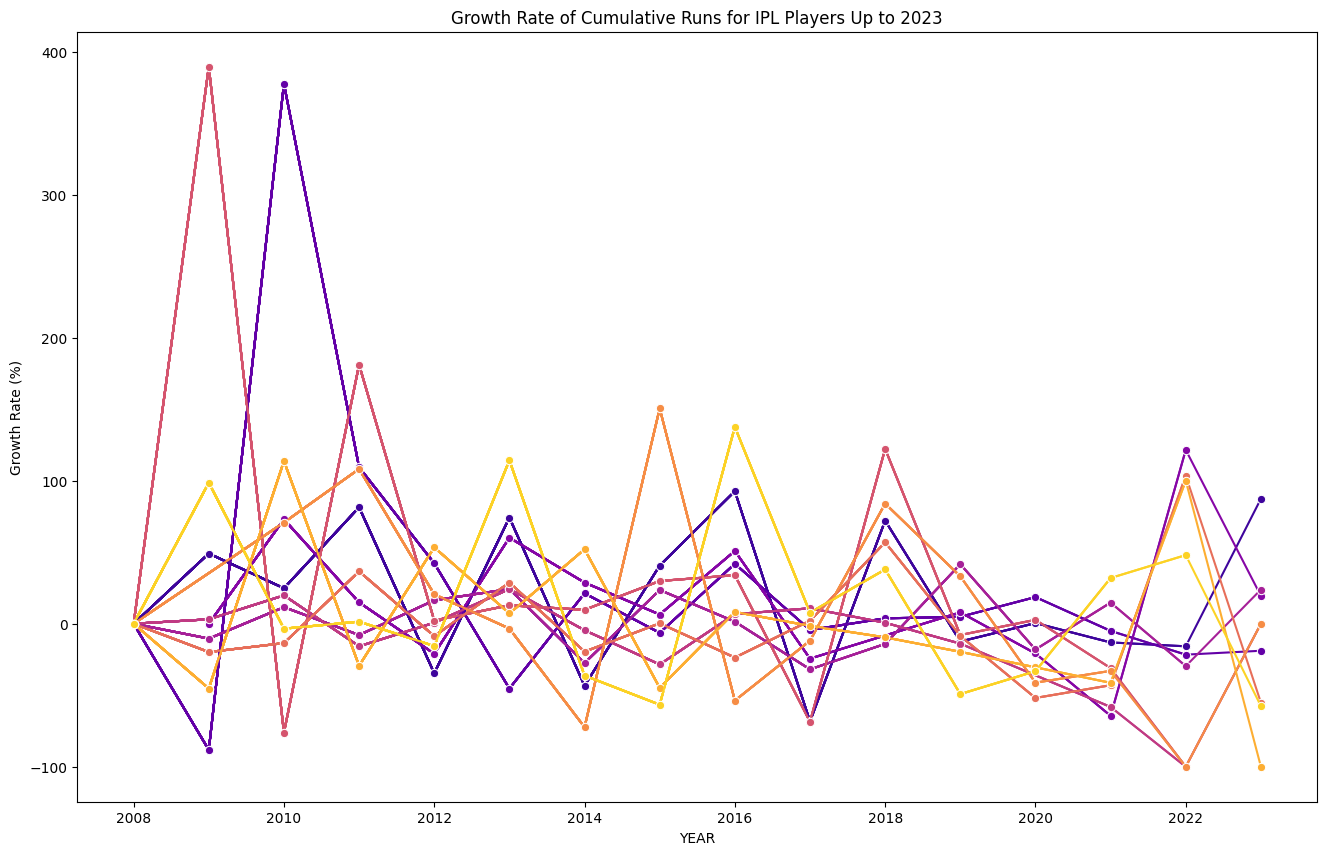

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Upload CSV file
file_path = '/content/IPL_Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert "Runs" column to numeric
df['RUNS'] = pd.to_numeric(df['RUNS'], errors='coerce')

# Calculate cumulative runs for each player over the years
df['Cumulative Runs'] = df.groupby(['Player', 'YEAR'])['RUNS'].cumsum()

# Create a new column for growth rate
df['Growth Rate'] = df.groupby('Player')['Cumulative Runs'].pct_change() * 100

# Fill missing growth rate values with 0 for the first year for each player
df['Growth Rate'] = df.groupby('Player')['Growth Rate'].transform(lambda x: x.fillna(0))

# Create an animated line chart for the growth rate of each player
plt.figure(figsize=(16, 10))

# Initialize legend outside the loop
legend = None

# Plot growth rate for each player
for year in df['YEAR'].unique():
    current_data = df[df['YEAR'] <= year]

    # Check if 'Growth Rate' column exists for the current year
    if 'Growth Rate' in current_data.columns:
        # Plot the data
        sns.lineplot(data=current_data, x='YEAR', y='Growth Rate', hue='Player', marker='o', palette='plasma')

        # Set title and labels
        plt.title(f'Growth Rate of Cumulative Runs for IPL Players Up to {year}')
        plt.xlabel('YEAR')
        plt.ylabel('Growth Rate (%)')

        # Check if legend already exists
        if legend:
            legend.remove()

        # Display the updated plot
        display(plt.gcf())

        # Pause for 0.5 seconds between frames
        time.sleep(0.5)

        # Clear the output
        clear_output(wait=True)

# Display the final legend outside the loop
plt.legend().remove()
plt.show()

# Objetive
Analysing each Player's Growth Rate over the years.
# Analysis

# Overall Analysis:
- Virat Kohli:
  - Has shown consistent growth in runs, except for a dip in 2012.
  - Highest run-scorer in multiple years.
  - Remarkable growth rate in 2016 with 92.67%.
  
- Shikhar Dhawan:
  - Significant improvement in recent years, especially in 2020 and 2021.
  - Experienced a dip in 2009 and 2013.
  - Consistent performer in the latter part of the dataset.

- David Warner:
  - Varied performance with ups and downs.
  - Notable growth in 2012 and 2014.
  - Significant drop in 2021, followed by a recovery in 2022 and 2023.

- Rohit Sharma:
  - Consistent performer with occasional fluctuations.
  - Outstanding growth in 2011 but faced a dip in 2012.
  - Experienced a dip in 2017 and 2018 but bounced back in 2019 and 2021.

- Suresh Raina:
  - Consistent performer with occasional dips.
  - Major contributions in the early years.
  - Absence in 2021 and 2022, leading to a substantial drop in total runs.

- AB DeVilliers:
  - Remarkable growth in 2011, 2015, and 2016.
  - Missed some years, affecting the overall growth pattern.
  - A dip in 2021 and 2022.

- MS Dhoni:
  - Consistent contributor with occasional dips.
  - Experienced a significant drop in 2016.
  - Notable recovery in 2018 and 2022.

- Chris Gayle:
  - Dominated in 2011 and 2012.
  - Inconsistent performances with notable dips.
  - Absence in 2022 and 2023, impacting the overall growth.

- Robin Uthappa:
  - Varied performances, with a significant dip in 2014.
  - Remarkable growth in 2014 and 2019.
  - Absence in 2022 and 2023.

- Dinesh Karthik:
  - Fluctuating performances with notable dips.
  - Significant growth in 2016 and 2022.
  - Absence in 2023.

# Growth Rate Analysis:
- Virat Kohli:
  - Experienced negative growth only in 2014 and 2015.

- Shikhar Dhawan:
  - Notable negative growth in 2009 and 2013.
  - Remarkable positive growth in recent years.

- David Warner:
  - Significant negative growth in 2012, 2017, and 2020.
  - Remarkable positive growth in 2014 and 2022.

- Rohit Sharma:
  - Experienced negative growth in 2009, 2017, and 2018.
  - Consistent positive growth in recent years.

- Suresh Raina:
  - Notable negative growth in 2011, 2014, and 2021.
  - Absence in 2021 and 2022.

- AB DeVilliers:
  - Remarkable positive growth in 2011, 2015, and 2016.
  - Significant negative growth in 2010 and 2017.

- MS Dhoni:
  - Experienced negative growth in 2015, 2016, 2020, and 2023.
  - Remarkable positive growth in 2012 and 2018.

- Chris Gayle:
  - Dominated with exceptionally high positive growth in 2011 and 2012.
  - Experienced significant negative growth in 2014 and 2020.

- Robin Uthappa:
  - Notable negative growth in 2009, 2013, and 2018.
  - Remarkable positive growth in 2014 and 2019.

- Dinesh Karthik:
  - Experienced negative growth in 2009, 2013, 2014, 2015, and 2019.
  - Remarkable positive growth in 2016 and 2022.

# Key Takeaways:
- Virat Kohli stands out as a consistent and reliable performer.
- Shikhar Dhawan has shown significant improvement in recent years.
- David Warner has displayed varied performances with notable highs and lows.
- Rohit Sharma remains a consistent performer, with occasional fluctuations.
- Suresh Raina has been consistent, but his absence in recent years impacted the team's performance.
- AB DeVilliers, Chris Gayle, and Robin Uthappa had remarkable contributions in specific years.
- MS Dhoni has been a consistent contributor, showing resilience after occasional dips.
- Dinesh Karthik's performances have been fluctuating, with notable highs in 2016 and 2022.

This detailed analysis provides insights into the individual player performances, growth rates, and the overall dynamics of the team across different years.

# Acknowledement - The codes have been adopted using ChatGPT and gemini ai. The dataset has been created using sportskeeda.com